# Mid-Project: Predicting Sports Winners
Data Science and Applied Machine Learning \\
Adopted from material from Dr. Kerby \\
Due 4/5/23 by 11:59 PM \\
100 Points \\
Student Name: Craig Price


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1: Gather Data from 2021-2022
*Gather* data from [Basketball Reference](https://www.basketball-reference.com/leagues/NBA_2022.html) <br>

Data can be downloaded by clicking on the `Share and Export` drop-down list at the middle top of available tables. Start off by clicking `Schedule and Results` and downloading the monthly games tables. Combine these into one table. Then import the full games-results table into python. 


In [121]:
from google.colab import files
uploaded = files.upload()

Saving BasketballData.csv to BasketballData (1).csv


In [139]:
import io
fullGameResults = pd.read_csv(io.BytesIO(uploaded['BasketballData.csv']))

### Question 2: EDA and Preprocessing
Explore your dataset and make any preprocessing adjustments necessary. You must perform at least 3 operations on exploring your data. Each one must provide unqiue insight to the data. At the bottom of this problem, write a paragraph (at least 5 sentences) explaining what you did and found out. 

In [140]:
print(fullGameResults.shape)
fullGameResults.head(5)

(1323, 11)


,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,Tue Oct 19 2021,7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,Box Score,NaN,17341.0,Fiserv Forum,NaN
1,Tue Oct 19 2021,10:00p,Golden State Warriors,121,Los Angeles Lakers,114,Box Score,NaN,18997.0,Crypto.com Arena,NaN
2,Wed Oct 20 2021,7:00p,Indiana Pacers,122,Charlotte Hornets,123,Box Score,NaN,15521.0,Spectrum Center,NaN
3,Wed Oct 20 2021,7:00p,Chicago Bulls,94,Detroit Pistons,88,Box Score,NaN,20088.0,Little Caesars Arena,NaN
4,Wed Oct 20 2021,7:30p,Boston Celtics,134,New York Knicks,138,Box Score,2OT,19812.0,Madison Square Garden (IV),NaN


In [141]:
print(fullGameResults['Unnamed: 6'].unique())
print(fullGameResults['Unnamed: 7'].unique())
print(fullGameResults['Notes'].unique())

['Box Score']
[nan '2OT' 'OT' '3OT']
[nan 'Play-In Game']


Boston Celtics            53
Golden State Warriors     51
Dallas Mavericks          51
Miami Heat                49
Memphis Grizzlies         47
Philadelphia 76ers        47
Phoenix Suns              47
Milwaukee Bucks           47
Atlanta Hawks             45
New Orleans Pelicans      45
Minnesota Timberwolves    44
Chicago Bulls             44
Utah Jazz                 44
Toronto Raptors           44
Denver Nuggets            44
Brooklyn Nets             43
Charlotte Hornets         42
San Antonio Spurs         42
Cleveland Cavaliers       42
Los Angeles Clippers      42
New York Knicks           41
Sacramento Kings          41
Oklahoma City Thunder     41
Orlando Magic             41
Houston Rockets           41
Washington Wizards        41
Detroit Pistons           41
Indiana Pacers            41
Portland Trail Blazers    41
Los Angeles Lakers        41
Name: Visitor/Neutral, dtype: int64


<Axes: title={'center': 'Visitor Games Played By Team'}>

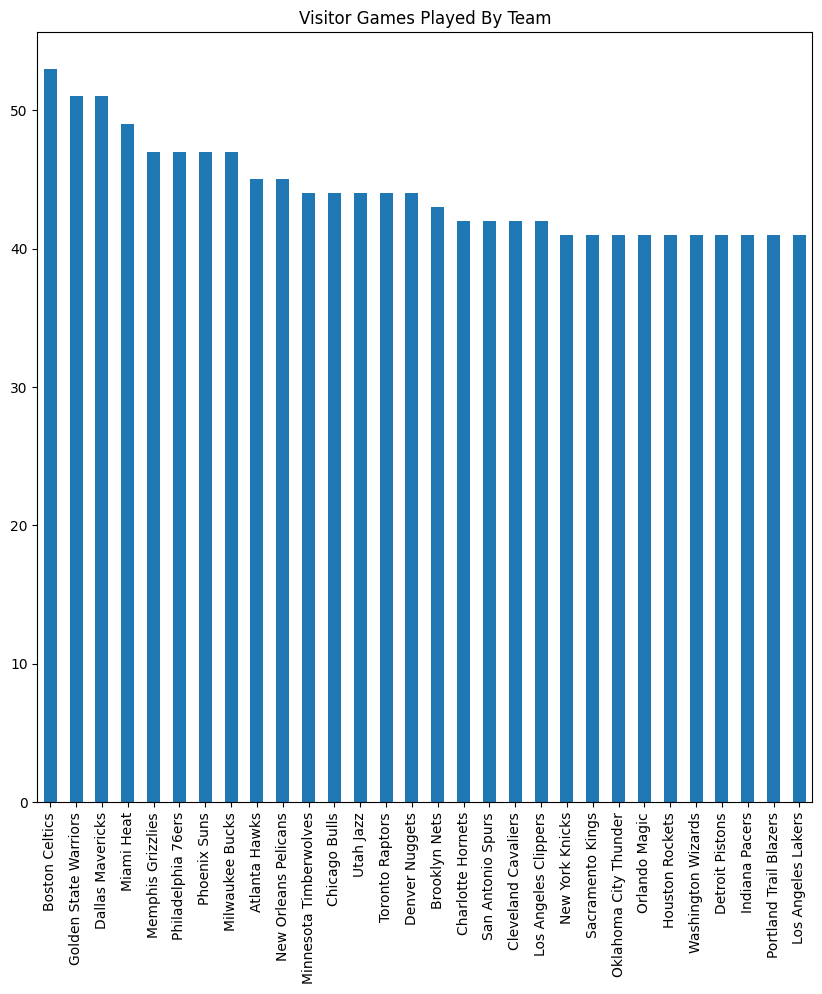

In [142]:
print(fullGameResults['Visitor/Neutral'].value_counts())
fullGameResults['Visitor/Neutral'].value_counts().plot.bar(figsize=(10,10),title='Visitor Games Played By Team')

Golden State Warriors     53
Boston Celtics            53
Miami Heat                51
Dallas Mavericks          49
Phoenix Suns              48
Memphis Grizzlies         47
Milwaukee Bucks           47
Philadelphia 76ers        47
Minnesota Timberwolves    45
New Orleans Pelicans      45
Utah Jazz                 44
Brooklyn Nets             44
Atlanta Hawks             44
Toronto Raptors           44
Chicago Bulls             43
Denver Nuggets            43
Los Angeles Clippers      42
Cleveland Cavaliers       42
Oklahoma City Thunder     41
Indiana Pacers            41
Sacramento Kings          41
New York Knicks           41
Houston Rockets           41
Charlotte Hornets         41
Orlando Magic             41
Los Angeles Lakers        41
Detroit Pistons           41
Portland Trail Blazers    41
San Antonio Spurs         41
Washington Wizards        41
Name: Home/Neutral, dtype: int64


<Axes: title={'center': 'Home Games played by Team'}>

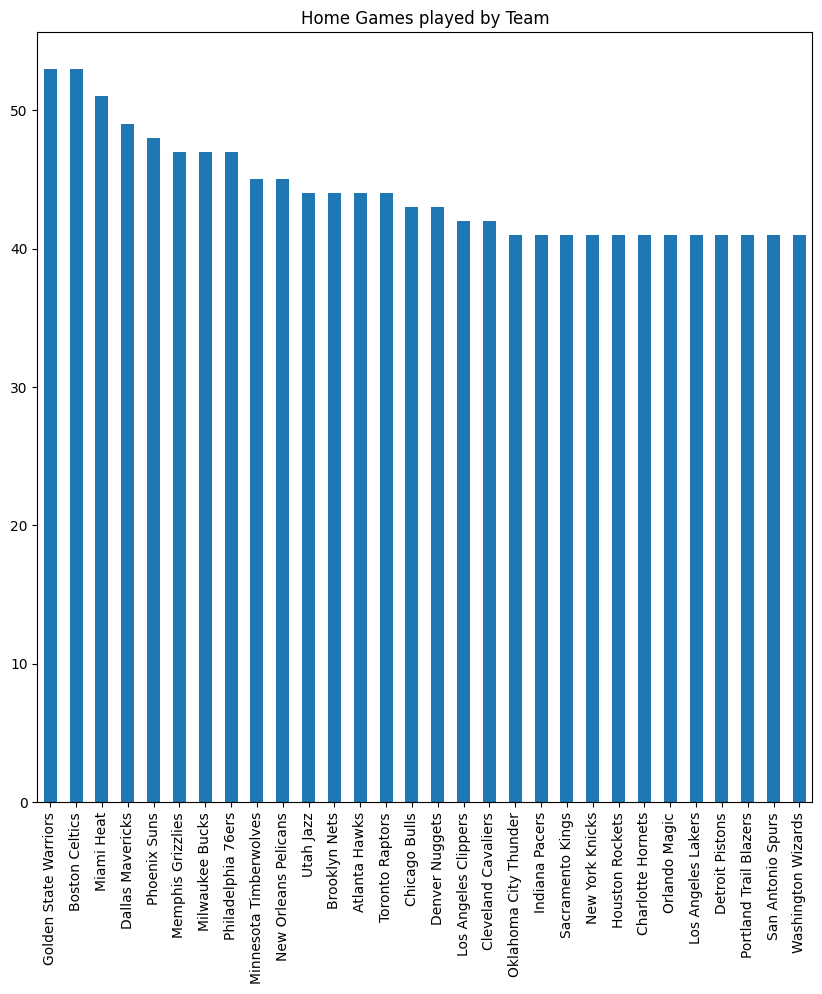

In [143]:
print(fullGameResults['Home/Neutral'].value_counts())
fullGameResults['Home/Neutral'].value_counts().plot.bar(figsize=(10,10),title='Home Games played by Team')

In [144]:
#renaming some columns to make more sense to me based on my data exploration
fullGameResults.rename(columns={"PTS" : "Visitor Points", "PTS.1" : "Home Points" , "Visitor/Neutral" : "Visitor Team" , "Home/Neutral" : "Home Team", "Unnamed: 7" : "Overtimes" }, inplace=True)

#since the Unnamed: 6 column just contained a link to the box score, it isn't helpful for us so I dropped it
fullGameResults = fullGameResults.drop("Unnamed: 6", axis=1)
#printing the processed data set. This looks much more understandable to me
fullGameResults.head(5)

,Date,Start (ET),Visitor Team,Visitor Points,Home Team,Home Points,Overtimes,Attend.,Arena,Notes
0,Tue Oct 19 2021,7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,NaN,17341.0,Fiserv Forum,NaN
1,Tue Oct 19 2021,10:00p,Golden State Warriors,121,Los Angeles Lakers,114,NaN,18997.0,Crypto.com Arena,NaN
2,Wed Oct 20 2021,7:00p,Indiana Pacers,122,Charlotte Hornets,123,NaN,15521.0,Spectrum Center,NaN
3,Wed Oct 20 2021,7:00p,Chicago Bulls,94,Detroit Pistons,88,NaN,20088.0,Little Caesars Arena,NaN
4,Wed Oct 20 2021,7:30p,Boston Celtics,134,New York Knicks,138,2OT,19812.0,Madison Square Garden (IV),NaN


# Question #2 Comments
The first thing I wanted to check was the size of my dataset, so I used the shape function. From this I was able to see that I had 1323 different games and each game had 11 columns of data. Next, I wanted to learn a little more about these different columns so I used the .head() method to see the column titles and a little bit of what was in each column. This helped me understand the obvious columns like Arena, Date, and Visitor/Neutral, but I still had no idea what was going on in the Unnamed: 6, Unnamed: 7, and Notes columns. To figure out more about these columns, I used the .unique() method to get a look at the different unique values in each column. I found out that Unnamed: 6 is just a link to the Box Score, Unnamed: 7 just lists whether the game went into overtime, and the Notes column notes whether a game was played at the Play-In tournament. Following this, I was curious about how many Home and away games each team played. I used value_counts() to find the counts of each different home and visitor team and graphed them to visualize this data. I see that each team played at least 41 home and away games, with some teams playing up to 53. I don't know where this variation came from but it could be due to tournaments or playoffs.

# Question 3: Feature Engineering

Create a column for whether or not the home team won the game; call it `HomeWin`. Use Pandas and your knowledge of Python to fill in this data. This will become our target -- ie what we are trying to predict. 

In [145]:
fullGameResults['HomeWin'] = fullGameResults['Home Points'] > fullGameResults['Visitor Points']
fullGameResults.head(5)

,Date,Start (ET),Visitor Team,Visitor Points,Home Team,Home Points,Overtimes,Attend.,Arena,Notes,HomeWin
0,Tue Oct 19 2021,7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,NaN,17341.0,Fiserv Forum,NaN,True
1,Tue Oct 19 2021,10:00p,Golden State Warriors,121,Los Angeles Lakers,114,NaN,18997.0,Crypto.com Arena,NaN,False
2,Wed Oct 20 2021,7:00p,Indiana Pacers,122,Charlotte Hornets,123,NaN,15521.0,Spectrum Center,NaN,True
3,Wed Oct 20 2021,7:00p,Chicago Bulls,94,Detroit Pistons,88,NaN,20088.0,Little Caesars Arena,NaN,False
4,Wed Oct 20 2021,7:30p,Boston Celtics,134,New York Knicks,138,2OT,19812.0,Madison Square Garden (IV),NaN,True


In [146]:
grouped = fullGameResults.groupby('HomeWin')
HomeWinner = grouped.get_group(True)
HomeWinner.shape[0]/fullGameResults.shape[0]

0.5479969765684052

After checking if the data is balanced, the home team won about 55% of the time. This seems relatively well balanced and shouldn't be an issue.

### Question 4: Feature Engineering II
Create two columns for how many games the home and visitor teams have won thus far in the season. Call them `HomeNumWins` and `VisitorNumWins`.
 
For example Game 1 for the Utah Jazz was against the OKC Thunder. The Jazz were the home team, OKC was the road team. Since this is game 1 for both teams `HomeNumWins` and `VisitorNumWins` will be 0. The Jazz won this game and were the road team for their next game (against the Sacramento Kings),  `VisitorNumWins` should be a 1 for this value. OKC would go on to lose their second game (on the road to Houston), Game 3 was their first home game. So for OKC's 3rd game (against the 76ers) `HomeNumWins` would be 0. 

Hint: Store each team and the number of intial wins (0) in a Python dictionary. You can then increment this value as you go through the dataset and use this information to update your feature. 



In [147]:
from collections import defaultdict
teamNumWins = defaultdict(int)
fullGameResults['HomeNumWins'] = 0
fullGameResults['VisitorNumWins'] = 0

for index, row in fullGameResults.iterrows():
  home_team = row['Home Team']
  visitor_team = row['Visitor Team']
  fullGameResults.loc[index,'HomeNumWins'] = teamNumWins[home_team]
  fullGameResults.loc[index,'VisitorNumWins'] = teamNumWins[visitor_team]

#update the dictionary with the results of each game
  if row['HomeWin'] == True:
    teamNumWins[home_team] = teamNumWins[home_team]+1
  else:
    teamNumWins[visitor_team] = teamNumWins[visitor_team]+1

#checking the tail because the head was full of zeros. It looks like everything worked
fullGameResults.tail(10)

,Date,Start (ET),Visitor Team,Visitor Points,Home Team,Home Points,Overtimes,Attend.,Arena,Notes,HomeWin,HomeNumWins,VisitorNumWins
1313,Wed May 25 2022,8:30p,Boston Celtics,93,Miami Heat,80,NaN,19819.0,FTX Arena,NaN,False,63,61
1314,Thu May 26 2022,9:00p,Dallas Mavericks,110,Golden State Warriors,120,NaN,18064.0,Chase Center,NaN,True,64,61
1315,Fri May 27 2022,8:30p,Miami Heat,111,Boston Celtics,103,NaN,19156.0,TD Garden,NaN,False,62,63
1316,Sun May 29 2022,8:30p,Boston Celtics,100,Miami Heat,96,NaN,20200.0,FTX Arena,NaN,False,64,62
1317,Thu Jun 2 2022,9:00p,Boston Celtics,120,Golden State Warriors,108,NaN,18064.0,Chase Center,NaN,False,65,63
1318,Sun Jun 5 2022,8:00p,Boston Celtics,88,Golden State Warriors,107,NaN,18064.0,Chase Center,NaN,True,65,64
1319,Wed Jun 8 2022,9:00p,Golden State Warriors,100,Boston Celtics,116,NaN,19156.0,TD Garden,NaN,True,64,66
1320,Fri Jun 10 2022,9:00p,Golden State Warriors,107,Boston Celtics,97,NaN,19156.0,TD Garden,NaN,False,65,66
1321,Mon Jun 13 2022,9:00p,Boston Celtics,94,Golden State Warriors,104,NaN,18064.0,Chase Center,NaN,True,67,65
1322,Thu Jun 16 2022,9:00p,Golden State Warriors,103,Boston Celtics,90,NaN,19156.0,TD Garden,NaN,False,65,68


### Question 5: Model

Train a decision tree model to determine if the home team won (a 1 is a win and a 0 is a loss. Evaluate your model. At the bottom of this problem write 2 paragraphs explaining your models, its performance and any possible issues you see with it. Comment on the most "important" features in the model.

Remember to split the dataset into training and testing sets and delete any columns that you deem unuseful. (Hint: Do not use any information that you wouldn't know before the game is played, the idea is to create a model that predicts wins)



In [148]:
#We are trying to predict a binary outcome, whether the home team won.
fullGameResults.head(5)
#firstly I want to drop the columns that will not be useful. The columns that we wouldn't know before the game is played is: Visitor Points, Home Points, Overtimes, and attend. 
#I think you might be able to predict the attendance but you won't know for certain until after the game
#I don't think the start time or date would be useful because we still want to predict the outcome between teams at a different time and date.
target = fullGameResults['HomeWin']
features = fullGameResults.drop(['Visitor Points','Home Points','Overtimes','Attend.','Date','Start (ET)','HomeWin'],axis=1)
features.head(5)
#now that the features are only things we will know before the game, we can create dummy variables. I think this will create a lot of variables for each different visitor team and each different home team.
features = pd.get_dummies(features)
features.head()

,HomeNumWins,VisitorNumWins,Visitor Team_Atlanta Hawks,Visitor Team_Boston Celtics,Visitor Team_Brooklyn Nets,Visitor Team_Charlotte Hornets,Visitor Team_Chicago Bulls,Visitor Team_Cleveland Cavaliers,Visitor Team_Dallas Mavericks,Visitor Team_Denver Nuggets,...,Arena_Smoothie King Center,Arena_Spectrum Center,Arena_State Farm Arena,Arena_TD Garden,Arena_Target Center,Arena_Toyota Center,Arena_United Center,Arena_Vivint Smart Home Arena,Arena_Wells Fargo Center,Notes_Play-In Game
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Now that I've got the features narrowed down, I can divide into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 1/5)

In [63]:
#Now we can train the decision tree :)
from sklearn import tree
class_tree = tree.DecisionTreeClassifier()
class_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
#evaluating the original model
print(class_tree.score(X_train,y_train))
print(class_tree.score(X_test,y_test))
#since the training data is much higher than the test data, this model is likely severely overfit.
class_tree.get_depth()
#this makes sense because with a depth of 36, there could be up to 35,000,000 different possible outcomes
#this tree severely needs pruning

1.0
0.5660377358490566


36

In [65]:
class_tree_pruned = tree.DecisionTreeClassifier(max_depth=4)
class_tree_pruned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [66]:
print(class_tree_pruned.score(X_train,y_train))
print(class_tree_pruned.score(X_test,y_test))

0.665406427221172
0.6150943396226415


In [59]:
y_predictions = class_tree_pruned.predict(X_test)

In [60]:
from sklearn.metrics import  precision_score, recall_score
print(precision_score(y_test, y_predictions, pos_label= True))
print(recall_score(y_test, y_predictions, pos_label= True))

0.6566265060240963
0.7032258064516129


In [61]:
importance = pd.Series(data=class_tree_pruned.feature_importances_, index = X_train.columns)
print(importance.sort_values(ascending=False))

VisitorNumWins                         0.369666
HomeNumWins                            0.287838
Visitor Team_Los Angeles Lakers        0.073383
Visitor Team_Cleveland Cavaliers       0.063039
Arena_Moda Center                      0.042332
                                         ...   
Visitor Team_Utah Jazz                 0.000000
Visitor Team_Toronto Raptors           0.000000
Visitor Team_Sacramento Kings          0.000000
Visitor Team_Portland Trail Blazers    0.000000
Notes_Play-In Game                     0.000000
Length: 92, dtype: float64


  # Question 5 Comments

  To begin with, I created a regular decision tree model with no hyperparameters. After training and scoring this decision tree, I found that the train score was 1.0 while the test score was only .566. This is a difference of 43.4% which means that this model is likely severely overfit. To verify this, I checked the depth and found that this decision tree was 36 levels deep, which means that this decision tree is likely very overfit. To try to fix this I created a new decision tree with the hyperparameter max depth equal to 4. After training and scoring this model, the train score was .665 and the test score was .615. This new model was much better because it was only overfit by about 5%.

  Next, I checked this model's precision score and recall score which was .6566 and .70322 respectively. These results are not exceptional as any value closer to 1 is better. a precision score of .6566 means that the ratio of true positives to total positives is .6566, meaning that this model will return a false positive 34.34% of the time. A recall score of .70322 means that the model correctly identified a positive 70.322% of the time. This means that on 29.678% of the predictions this model labeled a positive as a false negative.
  
  Finally, I checked the feature importances of this model. The most important features for this model by far were the HomeNumWins and VisitorNumWins. This makes sense because the number of wins should play a large role in how well a team is performing in a given season.

### Question 6: Add data from the previous season
Go back to the website and download the team standings from the PREVIOUS season. You will find it in the `Standings` tab. Keep just the number of wins and create two new columns called `HomeWins2020` and `VisitorWins2020`.

In [67]:
uploaded = files.upload()

Saving 20-21Standings.csv to 20-21Standings.csv


In [68]:
previousStandings = pd.read_csv(io.BytesIO(uploaded['20-21Standings.csv']))
#we need to drop the first row, then iterate through the rest of the list.
previousStandings = previousStandings.drop(0)
previousStandings.reset_index(inplace=True)
previousStandings.head(5)

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,...,All-Star,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5
0,1,1,Utah Jazz,52-20,31-5,21-15,24-6,28-14,7-3,10-0,...,27-9,25-11,3-2,39-7,2-2,13-3,12-2,9-4,9-7,7-2
1,2,2,Phoenix Suns,51-21,27-9,24-12,21-9,30-12,7-3,8-2,...,24-11,27-10,9-3,23-8,4-1,6-7,12-3,11-3,12-4,6-3
2,3,3,Philadelphia 76ers,49-23,29-7,20-16,31-11,18-12,10-2,8-7,...,24-12,25-11,7-3,27-12,4-1,11-5,7-6,10-3,10-6,7-2
3,4,4,Brooklyn Nets,48-24,28-8,20-16,26-16,22-8,8-4,9-6,...,24-13,24-11,3-5,24-11,3-2,10-7,9-4,11-2,10-6,5-3
4,5,5,Denver Nuggets,47-25,25-11,22-14,21-9,26-16,5-5,9-1,...,21-15,26-10,6-4,29-11,1-3,11-5,6-7,11-3,13-3,5-4


In [69]:
prevSeasonWins = defaultdict(int)
updatedGameResults = fullGameResults.copy()
updatedGameResults['HomeWins2020'] = 0
updatedGameResults['VisitorWins2020'] = 0

#setting each value in the dictionary
for index, row in previousStandings.iterrows():
  team = row['Unnamed: 1']
  prevSeasonWins[team] = int(row['Unnamed: 2'][:2])

#update the original data frame based on the team
for index, row in updatedGameResults.iterrows():
  home_team = row['Home Team']
  visitor_team = row['Visitor Team']
  updatedGameResults.loc[index,'HomeWins2020'] = prevSeasonWins[home_team]
  updatedGameResults.loc[index,'VisitorWins2020'] = prevSeasonWins[visitor_team]

#checking the head, after comparing to the website it looks like this approach worked.
updatedGameResults.head(10)


,Date,Start (ET),Visitor Team,Visitor Points,Home Team,Home Points,Overtimes,Attend.,Arena,Notes,HomeWin,HomeNumWins,VisitorNumWins,HomeWins2020,VisitorWins2020
0,Tue Oct 19 2021,7:30p,Brooklyn Nets,104,Milwaukee Bucks,127,NaN,17341.0,Fiserv Forum,NaN,True,0,0,46,48
1,Tue Oct 19 2021,10:00p,Golden State Warriors,121,Los Angeles Lakers,114,NaN,18997.0,Crypto.com Arena,NaN,False,0,0,42,39
2,Wed Oct 20 2021,7:00p,Indiana Pacers,122,Charlotte Hornets,123,NaN,15521.0,Spectrum Center,NaN,True,0,0,33,34
3,Wed Oct 20 2021,7:00p,Chicago Bulls,94,Detroit Pistons,88,NaN,20088.0,Little Caesars Arena,NaN,False,0,0,20,31
4,Wed Oct 20 2021,7:30p,Boston Celtics,134,New York Knicks,138,2OT,19812.0,Madison Square Garden (IV),NaN,True,0,0,41,36
5,Wed Oct 20 2021,7:30p,Washington Wizards,98,Toronto Raptors,83,NaN,19800.0,Scotiabank Arena,NaN,False,0,0,27,34
6,Wed Oct 20 2021,8:00p,Cleveland Cavaliers,121,Memphis Grizzlies,132,NaN,15975.0,FedEx Forum,NaN,True,0,0,38,22
7,Wed Oct 20 2021,8:00p,Houston Rockets,106,Minnesota Timberwolves,124,NaN,16079.0,Target Center,NaN,True,0,0,23,17
8,Wed Oct 20 2021,8:00p,Philadelphia 76ers,117,New Orleans Pelicans,97,NaN,12845.0,Smoothie King Center,NaN,False,0,0,31,49
9,Wed Oct 20 2021,8:30p,Orlando Magic,97,San Antonio Spurs,123,NaN,16697.0,AT&T Center,NaN,True,0,0,33,21


### Question 7: Repeat Model

Repeat your analysis from Question 5.

In [71]:
#Repeating the same process from #5:
target_2 = updatedGameResults['HomeWin']
features_2 = updatedGameResults.drop(['Visitor Points','Home Points','Overtimes','Attend.','Date','Start (ET)','HomeWin'],axis=1)
features_2.head(5)
#now that the features are only things we will know before the game, we can create dummy variables.
features_2 = pd.get_dummies(features_2)
features_2.head()

,HomeNumWins,VisitorNumWins,HomeWins2020,VisitorWins2020,Visitor Team_Atlanta Hawks,Visitor Team_Boston Celtics,Visitor Team_Brooklyn Nets,Visitor Team_Charlotte Hornets,Visitor Team_Chicago Bulls,Visitor Team_Cleveland Cavaliers,...,Arena_Smoothie King Center,Arena_Spectrum Center,Arena_State Farm Arena,Arena_TD Garden,Arena_Target Center,Arena_Toyota Center,Arena_United Center,Arena_Vivint Smart Home Arena,Arena_Wells Fargo Center,Notes_Play-In Game
0,0,0,46,48,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,42,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,33,34,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,20,31,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,41,36,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
#Now to split into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_2, target_2, test_size = 1/5)

In [114]:
#Train decision tree with no hyperparameters
class_tree2 = tree.DecisionTreeClassifier()
class_tree2.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [119]:
#scoring this new model
print(class_tree2.score(X_train2,y_train2))
print(class_tree2.score(X_test2,y_test2))
class_tree.get_depth()
#Again, the initial model is severely overfit. Let's train a new model with max_depth hyperparameter

1.0
0.569811320754717


36

In [111]:
class_tree2_pruned = tree.DecisionTreeClassifier(max_depth=4)
class_tree2_pruned.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=4)

In [116]:
print(class_tree2_pruned.score(X_train2,y_train2))
print(class_tree2_pruned.score(X_test2,y_test2))

0.6512287334593573
0.630188679245283


In [117]:
y_predictions2 = class_tree2_pruned.predict(X_test2)
print(precision_score(y_test2, y_predictions2, pos_label= True))
print(recall_score(y_test2, y_predictions2, pos_label= True))

0.6416184971098265
0.7551020408163265


In [118]:
importance2 = pd.Series(data=class_tree2_pruned.feature_importances_, index = X_train2.columns)
print(importance2.sort_values(ascending=False))

HomeWins2020                        0.347552
VisitorWins2020                     0.223083
VisitorNumWins                      0.108056
Home Team_Portland Trail Blazers    0.074096
HomeNumWins                         0.063795
                                      ...   
Visitor Team_Utah Jazz              0.000000
Visitor Team_Toronto Raptors        0.000000
Visitor Team_San Antonio Spurs      0.000000
Visitor Team_Sacramento Kings       0.000000
Notes_Play-In Game                  0.000000
Length: 94, dtype: float64


# Question #7 Comments
Similar to part 5, I first created a decision tree with no hyperparameters. This model was severely overfit and had a depth of 36. To remedy this, I limited the max depth to 4 on a new model.The results of the model with a max depth of four had a score of .65123 for the training data and a score of .6302 for the test data. This means it was only overfit by about .02 which should be acceptable.

This model got a precision score of .642 which is the ratio of true positives to total positives. This means that 35.8% of the positives were false positives. This model also got a recall score of .755 which is the ratio of true positives to total positives in the data set. This means that 24.5% of the positives were misclassified as a false negative. These results are not perfect but are better than a score of .5 for random guessing.

I also found the feature importances for this model. I found that the 'most important' features were the HomeWins2020 and VisitorWins2020 followed by VisitorNumWins. This makes sense because the HomeWins2020 and VisitorWins2020 should be accurate and they have more games from previous seasons which should help them be more accurate.

# Question 8: Analysis and Discussion
What was your best-performing model? \\
How well did it do? \\
Was it overfit? \\
What seems to be the most important feature(s)? \\
How well did your model perform compared to blindly guessing the Home Team won?

My best performing model was the model using data from the previous seasons in problem #7 limited with a hyperparameter to a max depth of 4. This model correctly predicted the outcome of the games in the training data 65% of the time and the test data about 63% of the time. Although this model was slightly overfit, it was only by about 2% which should be acceptable. It also has acceptable scores for the precision score and recall score.

The features that seem to be the 'most important' for both models was the records of the home team and the away team. The first model from question 5 used the wins for each team for the current season while the model in question 7 weighted the wins for each team from the previous season higher. This makes sense because there is more games played and it won't be basing it off of only 1 or 2 games played in the current season for some games. This also created a more accurate model, but it only predicted games about 1.5% better than the model from problem 5. This could be because of more outside factors like which players are still playing for a team and other things. Plus, there is always the chance for upsets in sports.

Both models did quite a bit better than blindly guessing. A blind guess would be correct 50% of the time and both models I trained in problem 5 and 7 were more accurate than that, by about 11-13%. This seems good for just using a small amount of data, but I believe it could be made more accurate by utilizing more features that would help describe each team and game better.

### GRADUATE STUDENTS ONLY
Incorporate new data in at least two different ways: \\
1) Go back to the website and incorporate more data (you choose which data to import; \\
2) Feature engineer at least one more feature from the data you have.

Repeat Question 5 modeling.

Repeat Question 8 analysis.